In [1]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

--2024-02-25 23:55:16--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/workshop3/challenge/challenge1.gwf [following]
--2024-02-25 23:55:17--  https://gwosc.org/s/workshop3/challenge/challenge1.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.73
Connecting to gwosc.org (gwosc.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf.7’

challenge1.gwf.7    100%[===================>]   3.84M  3.04MB/s    in 1.3s    

2024-02-25 23:55:19 (3.04 MB/s) - ‘challenge1.gwf.7’ saved [4025674/4025674]



In [3]:
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

/opt/conda/lib/python3.8/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [4]:
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [ ]:
# 1: What are the sampling rate and duration of the data?

In [5]:
duration = pycbc_strain.duration
print('Duration:', duration)

dt = pycbc_strain.delta_t
sampling_rate = 1/dt 
print('Sampling rate:' ,sampling_rate)


Duration: 128.0
Sampling rate: 4096.0


Text(0.5, 1.0, 'Plot in the time domain')

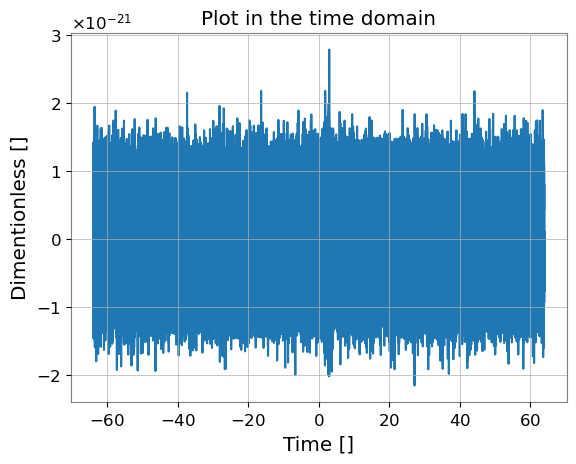

In [6]:
import pylab
plot = pylab.plot(pycbc_strain.sample_times.data, pycbc_strain.data)
pylab.xlabel("Time []")
pylab.ylabel("Dimentionless []")
pylab.title("Plot in the time domain")

In [54]:
# We can see that the start time is not zero, to figure out the starting time of the data collection:
t0 = gwpy_strain.t0
print(t0)

-64.0 s


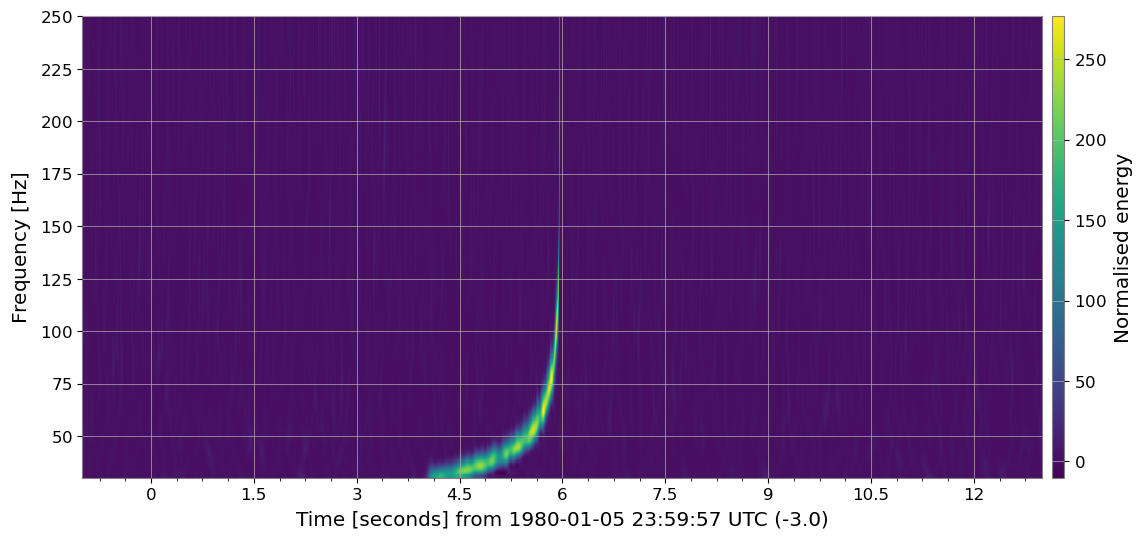

In [9]:
# data starts from t = -64 s, outseg to visualise data clearer
hq = gwpy_strain.q_transform(frange=(30, 250), qrange=(10, 15), outseg=(-4, 10))
plot = hq.plot()
plot.colorbar(label="Normalised energy")

In [ ]:
# Approximate time of merger from spectrogram: -15 s 